In [176]:
import pygame
import pygame.locals
from pygame import freetype
import numpy as np
import cv2

def render_normal(font, text):
    line_spacing = font.get_sized_height() +1
    line_bounds = font.get_rect(text)
    fsize = (round(2.0 * line_bounds.width), round(1 * line_spacing))
    surf = pygame.Surface(fsize, pygame.locals.SRCALPHA, 32)
    x, y = 0, line_spacing
    
    rect = font.render_to(surf, (x, y), text)
    rect.x = x + rect.x
    rect.y = y - rect.y
    
    surf = pygame.surfarray.pixels_alpha(surf).swapaxes(0, 1)
    loc = np.where(surf > 20)
    miny, minx = np.min(loc[0]), np.min(loc[1])
    maxy, maxx = np.max(loc[0]), np.max(loc[1])
    return surf[miny:maxy+1, minx:maxx+1], rect

def make_standard_text(font_path, text, shape, padding = 0.1, color = (0, 0, 0), init_fontsize = 25):
    font = freetype.Font(font_path)
    font.antialiased = True
    font.origin = True
    fontsize = init_fontsize
    font.size = fontsize
    pre_remain = None
    if padding < 1:
        border = int(min(shape) * padding)
    else:
        border = int(padding)
    target_shape = tuple(np.array(shape) - 2 * border)
    while True:
        rect = font.get_rect(text)
        res_shape = tuple(np.array(rect[1:3]))
        remain = np.min(np.array(target_shape) - np.array(res_shape))
        if pre_remain is not None:
            m = pre_remain * remain
            if m <= 0:
                if m < 0 and remain < 0:
                    fontsize -= 1
                if m == 0 and remain != 0:
                    if remain < 0:
                        fontsize -= 1
                    elif remain > 0:
                        fontsize += 1
                break
        if remain < 0:
            if fontsize == 2:
                break
            fontsize -= 1
        else:
            fontsize += 1
        pre_remain = remain
        font.size = fontsize

    surf, rect = render_normal(font, text)
    print(surf.shape)
    print(target_shape)
    if np.max(np.array(surf.shape) - np.array(target_shape)) >= 0:
        scale = np.min(np.array(target_shape, dtype = np.float32) / np.array(surf.shape, dtype = np.float32))
        to_shape = tuple((np.array(surf.shape) * scale).astype(np.int32)[::-1])
        surf = cv2.resize(surf, (to_shape[0], to_shape[1]+20))
    canvas = np.zeros(shape, dtype = np.uint8)
    tly, tlx = int((shape[0] - surf.shape[0]) // 2), int((shape[1] - surf.shape[1]) // 2)
    canvas[tly:tly+surf.shape[0], tlx:tlx+surf.shape[1]] = surf
    canvas = ((1. - canvas.astype(np.float32) / 255.) * 127.).astype(np.uint8)
    return cv2.cvtColor(canvas, cv2.COLOR_GRAY2RGB)

In [177]:

import pygame
from pygame import freetype
pygame.init()
freetype.init()
font = '/home/niwhskal/GP1-Srnet/CRAFT-pytorch/SRNet/arial.ttf'
res = make_standard_text(font, 'custom', (64, 150))

(31, 143)
(52, 138)


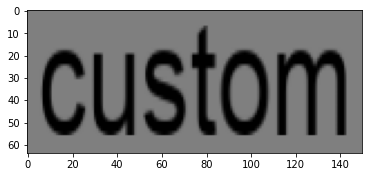

In [178]:
%matplotlib inline
from matplotlib import pyplot as plt

plt.imshow(res)
plt.show()